In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-08-30 13:42:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  17.3KB/s    in 4.1s    

2023-08-30 13:43:00 (17.3 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [7]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
cdf = df[['ENGINESIZE','CYLINDERS','TRANSMISSION','FUELTYPE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,6.7,196
1,2.4,4,M6,Z,11.2,7.7,221
2,1.5,4,AV7,Z,6.0,5.8,136
3,3.5,6,AS6,Z,12.7,9.1,255
4,3.5,6,AS6,Z,12.1,8.7,244
5,3.5,6,AS6,Z,11.9,7.7,230
6,3.5,6,AS6,Z,11.8,8.1,232
7,3.7,6,AS6,Z,12.8,9.0,255
8,3.7,6,M6,Z,13.4,9.5,267


In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["FUELCONSUMPTION_CITY"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
print("Coefficient : ", regr.coef_)
print("Intercept : ", regr.intercept_)

Coefficient :  [[13.67476312]]
Intercept :  [74.36490696]


<function matplotlib.pyplot.show(close=None, block=None)>

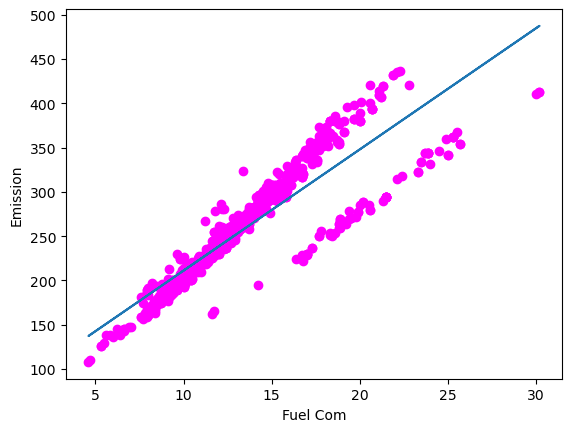

In [43]:

eol = regr.coef_*train_x + regr.intercept_
plt.scatter(train_x,train_y, color = 'magenta')
plt.plot(train_x,eol)
plt.xlabel("Fuel Com")
plt.ylabel("Emission")
plt.show

In [44]:
## Now model has been trained...now we will use our 20% of test data 
from sklearn.metrics import r2_score
test_x = np.array(test[["FUELCONSUMPTION_CITY"]])
test_y = np.array(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)
print("MAE : %.2f" %np.mean(np.absolute(test_y_ - test_y)))
print("MAS : %.2f" %np.mean((test_y_ - test_y)**2))
print("Accuracy: %r" % r2_score(test_y,test_y_))



MAE : 20.21
MAS : 827.01
Accuracy: 0.8171514626704351
